# Mount Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')
basedir = '/content/drive/My Drive/PSDA Group 4/Data/' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Install Dependencies

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Task 4

## Read Data

a) Lesen Sie den Datensatz Credit.csv ein. Erkunden Sie die Daten und konvertieren Sie
gegebenenfalls kategorische Variablen in ein geeignetes Format (z. B. mit pandas.get_dummies()
oder sklearn.model_selection.OneHotEncoder()). 

In [0]:
# read dataframe
df = pd.read_csv(basedir+'Credit.csv')
# delete index column
df = df.iloc[:,1:]
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Partitioning and Pre-Processing

c) Es wird hier untersucht, welche Variablen die Zielvariable Balance beeinflussen beziehungsweise
ihre guten Prädiktoren sind. Erstellen Sie aus der Variable Ethnicity drei binäre Variablen
Ethnicity_Caucasian, Ethnicity_Asian und Ethnicity_African. 


In [0]:
# since it's easier to handle binary values (0 and 1) instead of "Yes" and "No", we pre-process the data at this point
df['Student'] = df.Student.map(dict(Yes=1, No=0))
df['Married'] = df.Married.map(dict(Yes=1, No=0))
df['Male'] = df.Gender.map(dict(Male=1, Female=0))

In [0]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# one-hot encoding ethnicity and name new columns
enc_ethnicity = pd.DataFrame(columns = ['Ethnicity_African','Ethnicity_Asian','Ethnicity_Caucasian'] , data = enc.fit_transform(df[['Ethnicity']]).toarray())
# merge with full dataset
df = df.join(enc_ethnicity)

b) Separieren Sie den Datensatz in 80%-20% für Training und Testdatensatz. Was müssen Sie hier
beachten?

In [0]:
X = df.drop(columns=['Balance','Gender','Ethnicity'])
y = df['Balance']

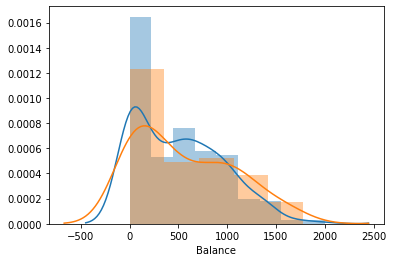

In [0]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
sns.distplot(y_train)
sns.distplot(y_test)

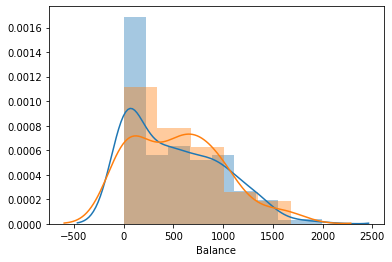

In [0]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
sns.distplot(y_train)
sns.distplot(y_test)

Here we need to keep in mind that we are not able to conduct a stratified partitioning because we're dealing with a regression problem. As we can see above, a different random state can lead to differences in the distribution of our output variable  

## OLS Regression

### No Limit Variable

Führen Sie eine lineare
Regression mit OLS als Schätzer mit diesen Variablen und allen anderen Variablen (außer Limit)
durch. Berechnen Sie Root Mean Square Error (RMSE) zwischen der Vorhersage und den wahren
Werten im Test-Datensatz. Beschreiben Sie Ihre Ergebnisse.

In [0]:
#statsmodels OLS regression
data = X_train.join(y_train)
model = sm.ols(formula="Balance ~ Ethnicity_African + Ethnicity_Asian + Ethnicity_Caucasian + Married + Student + Male + Education + Age + Cards + Rating + Income", data=data).fit()

y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

# Check accuracy scores for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 73.35662111851585
Mean Squared Error: 8955.390794543922
Root Mean Squared Error: 94.63292658765195


In [0]:
# double check with scikit linear regression
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train.drop(columns = ['Limit']),y_train)
predicted = lm.predict(X_test.drop(columns = ['Limit']))

# Check accuracy scores for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R Sqaured:', r2_score(y_test, predicted))

Mean Absolute Error: 73.35662111851687
Mean Squared Error: 8955.390794543953
Root Mean Squared Error: 94.63292658765211
R Sqaured: 0.9554267563369656


The RMSE is a measure of how spread out our residuals are. The residuals show us how far each data point is from the regression line. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance. However, since it is an absolute measure of fit (contrary to R squared for instance) we can't estimate whether 94.63 is a good value or not.



### No Limit & Caucasian

d) Führen Sie die Analyse in 4c) erneut durch, ohne die Variable Ethnicity_Caucasian. Vergleichen
Sie diese Ergebnisse mit denen aus 4c).


In [0]:
lm.fit(X_train.drop(columns = ['Limit','Ethnicity_Caucasian']),y_train)
predicted = lm.predict(X_test.drop(columns = ['Limit','Ethnicity_Caucasian']))

# Check accuracy scores for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 73.35662111851676
Mean Squared Error: 8955.390794543957
Root Mean Squared Error: 94.63292658765212


The results are almost exactly the same as compared to above. This means that the drop of the variable Ethnicity_Caucasian has no impact on the prediction accuracy.

### Income, Limit, Rating, Age Combination

e) Führen Sie eine lineare Regression (OLS) mit folgenden Variablen durch:
i. Income, Limit, Age
ii. Income, Rating, Age
iii. Income, Limit, Rating, Age
Beschreiben Sie die Koeffizienten, Konfidenzintervalle und Signifikanzniveau. Vergleichen Sie die
Ergebnisse.


In [0]:
data = X_train.join(y_train)

# Income, Limit, Age
print('---------------------   Income, Limit, Age --------------------------\n')
ols = sm.ols(formula="Balance ~ Income + Limit + Age", data=data).fit()
predicted = ols.predict(X_test)
print(ols.summary())
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  
#print('Coefficients')
#print(ols.params)
#print('\nConfidence Intervals')
#print(ols.conf_int(alpha=0.05, cols=None))
#print('\nConfidence')
#print(ols.pvalues)

# Income, Rating, Age
print('\n ------------------------  Income, Rating, Age ------------------------\n')
ols = sm.ols(formula="Balance ~ Income + Rating + Age", data=data).fit()
print(ols.summary())
#print('Coefficients')
#print(ols.params)
#print('\nConfidence Intervals')
#print(ols.conf_int(alpha=0.05, cols=None))
#print('\nConfidence')
#print(ols.pvalues)

# Income, Limit, Rating
print('\n -------------------- Income, Limit, Rating, Age ------------------------ \n')
ols = sm.ols(formula="Balance ~ Income + Limit + Rating + Age", data=data).fit()
print(ols.summary())
#print('Coefficients')
#print(ols.params)
#print('\nConfidence Intervals')
#print(ols.conf_int(alpha=0.05, cols=None))
#print('\nConfidence')
#print(ols.pvalues)

''' Same models but with scikit

# Income, Limit, Age
lm.fit(X_train_1,y_train)
predicted = lm.predict(X_test_1)
#check coefficients
print(lm.coef_)
# Check accuracy scores for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

# Income, Rating, Age
lm.fit(X_train_2,y_train)
predicted = lm.predict(X_test_2)

# Check accuracy scores for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

# Income, Limit, Rating
lm.fit(X_train_3, y_train)
predicted = lm.predict(X_test_3)

# Check accuracy scores for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

'''

---------------------   Income, Limit, Age --------------------------

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     751.3
Date:                Sun, 10 May 2020   Prob (F-statistic):          2.04e-143
Time:                        17:36:22   Log-Likelihood:                -2081.9
No. Observations:                 320   AIC:                             4172.
Df Residuals:                     316   BIC:                             4187.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

" Same models but with scikit\n\n# Income, Limit, Age\nlm.fit(X_train_1,y_train)\npredicted = lm.predict(X_test_1)\n#check coefficients\nprint(lm.coef_)\n# Check accuracy scores for regression\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  \nprint('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  \nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))\n\n# Income, Rating, Age\nlm.fit(X_train_2,y_train)\npredicted = lm.predict(X_test_2)\n\n# Check accuracy scores for regression\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))  \nprint('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))  \nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))\n\n# Income, Limit, Rating\nlm.fit(X_train_3, y_train)\npredicted = lm.predict(X_test_3)\n\n# Check accuracy scores for regression\nprint('Mean Absolute Error:', metrics.mean_ab

The values for income (coefficient, confidence interval and p value) are very similar. Changing the combination of features has no impact on the significance of the variable income.

Age is in general not a significant variable in order to predict the balance.

For Limit and Rating however, we can identify that using one of the variables without the other, the signifance is very high(very low p value) and the confidence intervals are very narrow. When combining the two variables limit and rating, both are less significant compared to when used individually and the confidence intervals are much wider. Same applied to the standard errors, which are higher for both variables when used in combination than used individually with other variables.

## Correlation

f) Was ist Korrelation? Wann benutzt man Pearson Korrelation, Spearman Korrelation und Kendalls
Tau? Berechnen Sie die Korrelationen zwischen allen Variablen im Trainings-Datensatz. Welche
Schlussfolgerung können Sie daraus ziehen?

Correlation shows how strongly a pairs of variables are related.
The Pearson correlation is used for determining the relationship between two continuous variables.
The Spearman correlation instead evaluates the monotonic relationship between two continuous or ordinal variables. It is based on the ranked values for each variable rather than the raw data. 
Similar to the spearman coefficient, the kendalls tau is also a rank correlation coefficient. It measures the ordinal association between two measured quantities.

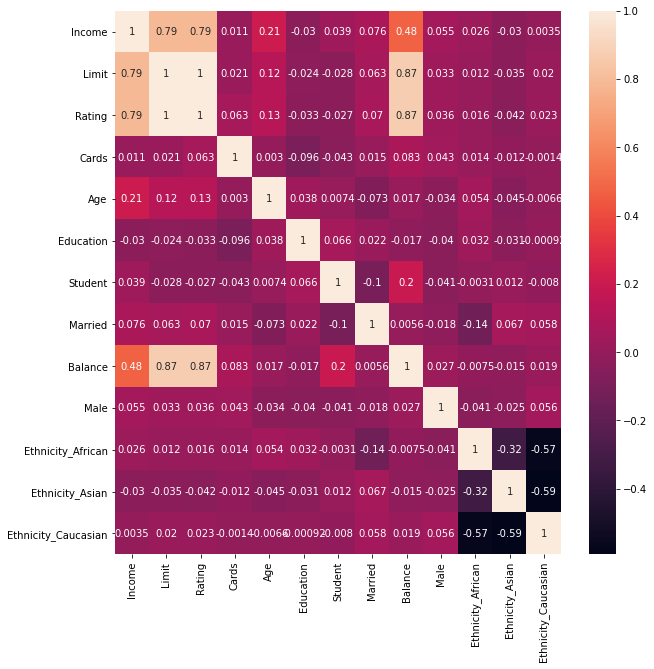

In [0]:
corrMatrix = df_train.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

By looking at the pairwise correlations, we can conclude that limit, balance and rating are highly positively correlated.

Income and balance are also quite highly positively correlated.



## Random Forest Regression

g) Führen Sie die Analyse in 4e) mit Random Forest, anstatt der linearen Regression durch. Variieren
Sie dabei den Parameter random_state mit den Werten {1, 33, 135, 123, 99, 22}, also z.B.
RandomForestRegressor(random_state=1) usw. und einigen selbstgewählten Werten. Berechnen 
4
Sie MSE des Test-Datensatzes. 
Hinweis: Wenn Sie die Analyse in Python durchführen, verwenden Sie train_test_split(X, y,
train_size = 0.8, random_state = 22)bei Train-Test-Split und untersuchen Sie den Rang der
Feature Importance.

In [0]:
X = df.drop(columns=['Balance','Ethnicity','Gender'])
y = df['Balance']

# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 22)

In [0]:
X_train_1 = X_train[['Income','Limit','Age']]
X_train_2 = X_train[['Income','Rating','Age']]
X_train_3 = X_train[['Income','Limit','Rating', 'Age']]

X_test_1 = X_test[['Income','Limit','Age']]
X_test_2 = X_test[['Income','Rating','Age']]
X_test_3 = X_test[['Income','Limit','Rating', 'Age']]

In [0]:
seeds = [1,33,135,123,99,22, 40, 45, 50, 52]

for seed in seeds:
	rf = RandomForestRegressor(random_state=seed)
	rf.fit(X_train_1, y_train)
	y_pred = rf.predict(X_test_1)
	# MSE of the test dataset
	print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
	# get importance
	importance = rf.feature_importances_
	print(importance)


	rf.fit(X_train_2, y_train)
	y_pred = rf.predict(X_test_2)
	# MSE of the test dataset
	print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
	# get importance
	importance = rf.feature_importances_
	print(importance)

	rf.fit(X_train_3, y_train)
	y_pred = rf.predict(X_test_3)
	# MSE of the test dataset
	print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
	# get importance
	importance = rf.feature_importances_
	print(importance)

	print('\n\n')

Mean Squared Error: 43017.610067500005
[0.10225054 0.87782872 0.01992075]

Mean Squared Error: 47519.10468
[0.10782532 0.86895979 0.02321489]

Mean Squared Error: 43593.172071249995
[0.09345839 0.35977738 0.52916555 0.01759868]



Mean Squared Error: 42861.3993975
[0.10385542 0.87617428 0.0199703 ]

Mean Squared Error: 47917.0505825
[0.10814339 0.86915562 0.02270099]

Mean Squared Error: 44350.306335
[0.09398254 0.39801517 0.49172006 0.01628222]



Mean Squared Error: 43384.31007625001
[0.10167593 0.87726166 0.0210624 ]

Mean Squared Error: 48105.605065
[0.10927512 0.86692628 0.02379861]

Mean Squared Error: 44549.88568000001
[0.09243091 0.35078134 0.53948307 0.01730468]



Mean Squared Error: 43375.3085575
[0.10398083 0.87650379 0.01951538]

Mean Squared Error: 46181.7018575
[0.11026277 0.86815135 0.02158588]

Mean Squared Error: 43804.20978625
[0.09339442 0.29528217 0.59486187 0.01646154]



Mean Squared Error: 42006.48881624999
[0.10654836 0.87507323 0.01837841]

Mean Squared Error:

### Feature Importances and random seeds

Vergleichen Sie Feature Importance. Welche Schlussfolgerung
können Sie daraus ziehen?

Age has a very low feature importance, in all feature combinations. Limit and Rating are very dominant predictors (more than 85% importance) when used without the other variable. When used together, the importance for limit and rating are more balanced, with Rating being the more important predictor.

The importance for income stays constantly around 10%.

We also need to take into account that depending on the random_state seed, the performance of the Random Forest Regressor variies. 

## Multicollinearity

h) Was ist Multikollinearität? Was sind die möglichen Ursachen und Auswirkungen? Wie kann man sie
erkennen? Welche Maßnahmen gibt es, wenn Variablen in den Daten kollinear sind?

"Collinearity refers to the situation in which two or more predictor variables are closely related to one another." (ISLR, p.99) 
For instance, the variables **limit** and **rating** are highly correlated. They tend to increase or decrease together. Since they are both independent variables used to predict the dependent variable balance, they are collinear. In our regression context, collinearity can lead to difficulties in identifying how each one of the variables separately is associated with the response varaible. Collinearity reduces the accuracy of the estimates of the regression coefficients.

One simple way to detect collinearity is by looking at the correlation matrix of the predictors.

In case of collinearity, there are two possible ways to solve the problem. First one is to drop one of the problematic variable from the regression. The second option is to combine the variables into one single predictor.